# Relative correlation length

How to derive a relative correlation length based on the topography gradients

In [22]:
using divand
using PyPlot

In [23]:
dx = dy = 0.1
lonr = 2.5:dx:12.
latr = 42.3:dy:44.6

42.3:0.1:44.6

In [24]:
# https://b2drop.eudat.eu/s/ACcxUEZZi6a4ziR/download  gebco_30sec_4.nc
# https://b2drop.eudat.eu/s/x83MSV8yUF934bL/download  gebco_30sec_8.nc
# https://b2drop.eudat.eu/s/o0vinoQutAC7eb0/download  gebco_30sec_16.nc

bathname = "gebco_30sec_4.nc"

if !isfile(bathname)
    download("https://b2drop.eudat.eu/s/ACcxUEZZi6a4ziR/download",bathname)
else
    info("Bathymetry file already downloaded")
end

bathisglobal = true

INFO: Bathymetry file already downloaded


true

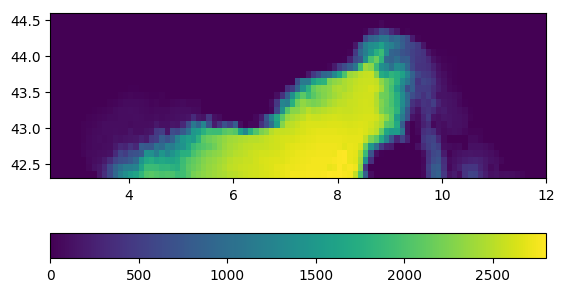

PyObject <matplotlib.colorbar.Colorbar object at 0x7f78a3c5a150>

In [28]:
bx,by,b = divand.load_bath(bathname,true,lonr,latr)

mask = b .< 0
b[b .< 0] = 0;

pcolor(bx,by,b');  
gca()[:set_aspect](1/cos(mean([ylim()...]) * pi/180))
colorbar(orientation="horizontal")

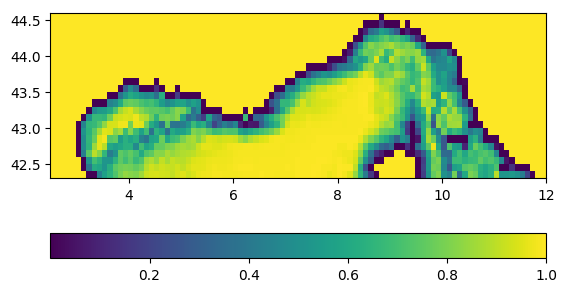

PyObject <matplotlib.colorbar.Colorbar object at 0x7f78a3a3f390>

In [29]:
x,y = divand.ndgrid(bx,by);
pm,pn = divand.divand_metric(x,y)

L = 10_000 # m

RL = divand.lengraddepth((pm,pn),b, L)

pcolor(bx,by,RL'); 
gca()[:set_aspect](1/cos(mean([ylim()...]) * pi/180))
colorbar(orientation="horizontal")


In [37]:
depthr = [0.,10.,20.]
length(depthr)
RL3D = repeat(RL,inner=(1,1,length(depthr)))
size(RL3D)

(96, 24, 3)

Parameter `len` for diva3d is then:

In [44]:
len = (RL3D,RL3D,RL3D);

Internally diva3d will multiply the relative correlation length with the result of `fithorzcorr` and `fithvertcorr` if the option `fitcorrlen` is true.